In [3]:
import torch
import numpy as np

Check if torch package is installed

In [7]:
x = torch.rand(5, 3)

In [8]:
x

tensor([[0.2805, 0.0697, 0.3695],
        [0.3639, 0.2688, 0.1976],
        [0.7734, 0.3567, 0.5619],
        [0.3607, 0.6809, 0.9288],
        [0.8898, 0.9437, 0.8421]])

## Basics

### 1. Tensors

#### Initializing a tensor

In [10]:
x = [[1, 2], [3, 4]]

In [14]:
xt = torch.tensor(x)
print(type(xt))
xt

<class 'torch.Tensor'>


tensor([[1, 2],
        [3, 4]])

In [15]:
xnp = np.array(x)
xt = torch.from_numpy(xnp)
print(type(xt))
xt

<class 'torch.Tensor'>


tensor([[1, 2],
        [3, 4]])

In [17]:
x_ones = torch.ones_like(xt)
x_ones

tensor([[1, 1],
        [1, 1]])

In [20]:
x_rand = torch.rand_like(xt, dtype = torch.float)
x_rand

tensor([[0.7117, 0.4178],
        [0.9631, 0.3451]])

In [23]:
rand_t = torch.rand(5, 3)
ones_t = torch.ones(4, 5)
zeros_t = torch.zeros(1, 3)

#### Attributes of a tensor
More [here](https://pytorch.org/docs/stable/tensor_attributes.html)

In [24]:
xt.shape

torch.Size([2, 2])

In [25]:
xt.device

device(type='cpu')

In [26]:
xt.dtype

torch.int64

#### Operations on tensors
More [here](https://pytorch.org/docs/stable/torch.html)

In [29]:
# moving tensor to the GPU if available
if torch.cuda.is_available():
    xt = xt.to('cuda')

In [30]:
xt.device

device(type='cuda', index=0)

In [33]:
# numpy like slicing annd indexing
print(xt[1])
print(xt[:, 1])

tensor([3, 4], device='cuda:0')
tensor([2, 4], device='cuda:0')


In [42]:
# joining tensors
t1 = torch.cat([x_ones, x_rand], dim = 1)
print(t1)
t2 = torch.cat([x_ones, x_rand], dim = 0)
print(t2)

tensor([[1.0000, 1.0000, 0.7117, 0.4178],
        [1.0000, 1.0000, 0.9631, 0.3451]])
tensor([[1.0000, 1.0000],
        [1.0000, 1.0000],
        [0.7117, 0.4178],
        [0.9631, 0.3451]])


In [53]:
# arithmetic operations
t = torch.rand(2, 3)
print(t)

# matrix multiplication
y1 = t @ t.T; print(y1)
y2 = t.matmul(t.T); print(y2)
y3 = torch.matmul(t, t.T); print(y3)

# element wise product
z1 = t * t ; print(z1)
z2 = t.mul(t); print(z2)

tensor([[0.7136, 0.1295, 0.6589],
        [0.1183, 0.7355, 0.3881]])
tensor([[0.9602, 0.4354],
        [0.4354, 0.7056]])
tensor([[0.9602, 0.4354],
        [0.4354, 0.7056]])
tensor([[0.9602, 0.4354],
        [0.4354, 0.7056]])
tensor([[0.5093, 0.0168, 0.4342],
        [0.0140, 0.5410, 0.1507]])
tensor([[0.5093, 0.0168, 0.4342],
        [0.0140, 0.5410, 0.1507]])


In [61]:
# single element tensor
t = torch.rand(5, 1)
y = t.T @ t
print(y.item())

# inplace operations
print(t)
t.add_(4)
print(t)

0.8229666948318481
tensor([[0.5133],
        [0.3222],
        [0.0692],
        [0.5482],
        [0.3878]])
tensor([[4.5133],
        [4.3222],
        [4.0692],
        [4.5482],
        [4.3878]])


### 2. Datasets and DataLoaders

Datasets: torch.utils.data.Dataset <br>
Dataloader: torch.utils.data.Dataloader

#### Loading a DataSet

In [200]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [201]:
training = datasets.FashionMNIST(root = 'data', train = True, download = True, transform = ToTensor())
#training = datasets.FashionMNIST(root = 'data', train = True, download = True)

In [7]:
type(training)

torchvision.datasets.mnist.FashionMNIST

In [202]:
test = datasets.FashionMNIST(root = 'data', train = False, download = True, transform = ToTensor())

In [9]:
type(test)

torchvision.datasets.mnist.FashionMNIST

#### Iterating and Visualizing Dataset

In [11]:
training[1] # gives image and label

(<PIL.Image.Image image mode=L size=28x28 at 0x7FA2FC6A2220>, 0)

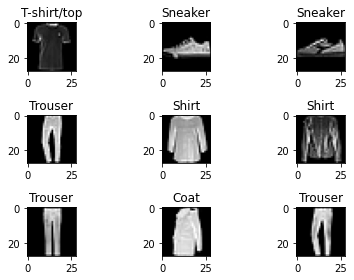

In [13]:
import matplotlib.pyplot as plt
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fig, ax = plt.subplots(3, 3)
ax = ax.flatten()
n = len(training)
for i in range(9):
    idx = torch.randint(0, n, size = (1,)).item()
    img, l = training[idx]
    ax[i].imshow(img.squeeze(), cmap = 'gray')
    ax[i].set_title(labels[l])
plt.tight_layout()
plt.show()

#### Creating a custom Dataset for your files

In [8]:
import os
import pandas as pd
from torchvision.io import read_image

In [14]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform = None, target_transform = None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transfrom = transform
        self.target_transform = target_transfotrm
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

#### Prepapring your data for training using Dataloaders

In [204]:
from torch.utils.data import DataLoader

In [205]:
train_dl = DataLoader(training, batch_size = 64, shuffle = True)
test_dl = DataLoader(test, batch_size = 64, shuffle = True)

#### Iterate through a DataLoader
More [here](https://pytorch.org/docs/stable/data.html)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([64])


Text(0.5, 1.0, 'tensor(8)')

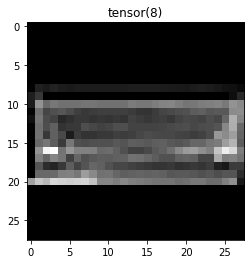

In [35]:
train_features, train_labels = next(iter(train_dl))
print(type(train_features))
print(train_features.shape)

print(type(train_labels))
print(train_labels.shape)

#showing an image
img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap = 'gray')
plt.title(label)

### 3. Transforms
More on transforms is [here](https://pytorch.org/vision/stable/transforms.html)

Datasets have two: transform (for features), target_transform (for labels)

In [38]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

In [41]:
ds = datasets.FashionMNIST(root = 'data', train = True, download = True, transform = ToTensor, 
                          target_transform = Lambda(lambda y: torch.zeros(10, dtype = torch.float)
                                                    .scatter_(0, torch.tensor(y), value = 1)))


### 4. Build The Neural Network
[torch.nn](https://pytorch.org/docs/stable/nn.html) provides all the building blocks required to build neural network <br>
Every module in pytorch subclasses the nn.Module

In [1]:
import os
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
# device for training
if torch.cuda.is_available(): 
    device = 'cuda'
else:
    device = 'cpu'

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10))
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [6]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [21]:
# dummy training
X = torch.rand(1, 28, 28, device = device)
logits = model(X)
pred_prob = nn.Softmax(dim = 1)(logits)
y_pred = pred_prob.argmax(1)
print(y_pred)

tensor([3], device='cuda:0')


##### Understanding the layers

In [22]:
# creating a random batch of 3
input_image = torch.rand(3, 28, 28)

# flatten 
flatten = nn.Flatten()
flat_img = flatten(input_image)
print(flat_img.shape)
# the batch size dimension is preserved

torch.Size([3, 784])


Linear Layer

In [49]:
# linear layer
layer1 = nn.Linear(in_features = 28 * 28, out_features = 10)
print(f'{type(layer1)}')
hidden = layer1(flat_img)
print(type(hidden))
print(hidden.shape)
print(hidden)

# the values of hidden keep changing indicating a random initialization

<class 'torch.nn.modules.linear.Linear'>
<class 'torch.Tensor'>
torch.Size([3, 10])
tensor([[ 0.5409, -0.3425,  0.4532,  0.0724, -0.2413, -0.5459, -0.2258,  0.2326,
          0.0505, -0.0187],
        [ 0.4050, -0.3639,  0.6129,  0.4498, -0.4928, -0.1649,  0.1713,  0.0512,
         -0.4692, -0.0249],
        [ 0.4236, -0.3390,  0.6898,  0.2630, -0.4060,  0.0318,  0.1440,  0.1129,
         -0.0271,  0.0827]], grad_fn=<AddmmBackward0>)


ReLU

In [51]:
hidden_r = nn.ReLU()(hidden)
print(type(hidden_r))
print(hidden_r)

<class 'torch.Tensor'>
tensor([[0.5409, 0.0000, 0.4532, 0.0724, 0.0000, 0.0000, 0.0000, 0.2326, 0.0505,
         0.0000],
        [0.4050, 0.0000, 0.6129, 0.4498, 0.0000, 0.0000, 0.1713, 0.0512, 0.0000,
         0.0000],
        [0.4236, 0.0000, 0.6898, 0.2630, 0.0000, 0.0318, 0.1440, 0.1129, 0.0000,
         0.0827]], grad_fn=<ReluBackward0>)


nn.Sequential - Container of ordered modules

In [67]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(10, 10))
input_img = torch.rand(3, 28, 28)
logits = seq_modules(input_img)
print(type(seq_modules))
print(type(logits))
print(logits)

<class 'torch.nn.modules.container.Sequential'>
<class 'torch.Tensor'>
tensor([[ 0.2634,  0.2871,  0.0950,  0.4227, -0.2539, -0.0685,  0.3196,  0.0168,
          0.0765,  0.0996],
        [ 0.2299,  0.3891,  0.1973,  0.5329, -0.2547, -0.0624,  0.1473, -0.0439,
          0.0973,  0.1616],
        [ 0.2763,  0.3217,  0.1178,  0.4454, -0.2047, -0.0901,  0.4057,  0.0234,
          0.0383,  0.0984]], grad_fn=<AddmmBackward0>)


nn.Softmax

In [69]:
softmax = nn.Softmax(dim = 1)
pred_prob = softmax(logits)
print(type(softmax))
print(type(pred_prob))

<class 'torch.nn.modules.activation.Softmax'>
<class 'torch.Tensor'>


##### Model Parameters
nn.module automatically tracks all fields defined inside your model object

In [70]:
print(f'Model Structure:', model)

Model Structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [74]:
print(model.parameters())
print(model.named_parameters())

for name, param in model.named_parameters():
    print(name, param.shape, param)

<generator object Module.parameters at 0x7f5a94347660>
<generator object Module.named_parameters at 0x7f5a94347660>
linear_relu_stack.0.weight torch.Size([512, 784]) Parameter containing:
tensor([[-0.0155,  0.0174,  0.0085,  ...,  0.0190,  0.0225, -0.0102],
        [ 0.0228,  0.0136, -0.0073,  ..., -0.0267, -0.0211, -0.0235],
        [-0.0165,  0.0122,  0.0222,  ...,  0.0105, -0.0120,  0.0180],
        ...,
        [-0.0135, -0.0025, -0.0308,  ...,  0.0108,  0.0169,  0.0137],
        [ 0.0205,  0.0322, -0.0005,  ...,  0.0169,  0.0175,  0.0237],
        [-0.0285, -0.0040,  0.0285,  ..., -0.0200,  0.0186, -0.0054]],
       device='cuda:0', requires_grad=True)
linear_relu_stack.0.bias torch.Size([512]) Parameter containing:
tensor([ 3.4311e-02, -2.3128e-02,  3.3177e-02,  3.7945e-03, -1.5008e-04,
        -1.7187e-02,  2.7271e-02,  2.8450e-02, -4.9641e-03,  1.2112e-02,
        -2.3869e-02,  1.5980e-02, -2.6875e-02, -2.8790e-03, -8.8317e-03,
         7.6646e-03,  1.2382e-02, -9.1911e-03, -2.

### 5. Automatic Differentiation with Autograd
Autograd: Built-in differentiation engine. Automatic computation of gradient for any computational graph <br>
More [here](https://pytorch.org/docs/stable/autograd.html)

In [83]:
import torch

x = torch.ones(5)
y = torch.tensor([3,4,5], dtype = torch.float)
w = torch.rand(5, 3, requires_grad = True)
b = torch.rand(3, requires_grad = True)

z = torch.matmul(x, w) + b

loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

A function that we apply to tensors to construct computational graph is in fact an object of class Function. This object knows how to compute the function in the forward direction, and also how to compute its derivative during the backward propagation step. A reference to the backward propagation function is stored in grad_fn property of a tensor.

In [84]:
print(f'The gradient function for z = ', z.grad_fn)
print(f'The function for loss = ', loss.grad_fn)

The gradient function for z =  <AddBackward0 object at 0x7f5a9434feb0>
The function for loss =  <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f5a9434f7c0>


#### Computing Gradients

In [144]:
loss.backward(retain_graph = True)
print(w.grad)
print(b.grad)

tensor([[-40.7225, -60.5473, -80.4446],
        [-40.7225, -60.5473, -80.4446],
        [-40.7225, -60.5473, -80.4446],
        [-40.7225, -60.5473, -80.4446],
        [-40.7225, -60.5473, -80.4446]])
tensor([-40.7225, -60.5473, -80.4446])


- The grad properties are only stored for the variables which had the require_grad = True
- We can perform backward calculations only once on a given graph, for several backward call on the same graph, put retain_graph = True

But how is this working? As I run the above cell runs multiple times the values keep on increasing

##### Disable Gradient Tracking
Possible reasons for that: 
- Frozen parameters
- Speed up computations

In [145]:
z = torch.matmul(x, w) + b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)

True
False


In [148]:
# can use detach also
z = torch.matmul(x, w) + b
print(z.requires_grad)

z_det = z.detach()
print(z_det.requires_grad)

True
False


##### Computational Graphs
In a forward pass, autograd does two things simultaneously:

- run the requested operation to compute a resulting tensor
- maintain the operation’s gradient function in the DAG.

The backward pass kicks off when .backward() is called on the DAG root. autograd then:

- computes the gradients from each .grad_fn,
- accumulates them in the respective tensor’s .grad attribute
- using the chain rule, propagates all the way to the leaf tensors.

---

### 6. Optimizing model parameters

##### Hyperparameters
- Number of Epochs
- Batch Size
- Learning Rate

More [here](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html)

In [151]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

##### Loss Function 
[nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) (Mean Square Error), [nn.NLLLoss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss) (Negative Likelihood Loss) <br>
[nn.CrossEntropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) (Combines nn.LogSoftmax, nn.NLLLoss)

In [149]:
loss_fn = nn.CrossEntropyLoss()

##### Optimizer object
Stochastic Gradient Descent, Adam, RMS Prop etc. <br>
Optimization loop: train loop, test loop

In [152]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Inside the training loop, optimization happens in three steps:
- Call optimizer.zero_grad() - reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
- Backpropagate the prediction loss with a call to loss.backward(). PyTorch deposits the gradients of the loss w.r.t. each parameter.
- Once we have our gradients, we call optimizer.step() to adjust the parameters by the gradients collected in the backward pass.

In [213]:
# training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        y = y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f'\nLoss: {loss:>7f} [{current}/{size}] \n')
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= num_batches
    correct /= size
    print(f'Test: \n Accuracy: {correct}, Loss: {test_loss}\n')

In [215]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

epochs = 5
for t in range(epochs):
    print(f'Epoch {t+1}: \n---------------------------')
    train_loop(train_dl, model, loss_fn, optimizer)
    test_loop(test_dl, model, loss_fn)
print('Done!! Congo!!')

Epoch 1: 
---------------------------
Loss: 0.741353 [0/60000]
Loss: 0.806062 [6400/60000]
Loss: 0.733940 [12800/60000]
Loss: 0.760040 [19200/60000]
Loss: 0.649689 [25600/60000]
Loss: 0.661684 [32000/60000]
Loss: 0.826187 [38400/60000]
Loss: 0.793870 [44800/60000]
Loss: 0.711397 [51200/60000]
Loss: 0.683152 [57600/60000]
Test: Accuracy: 0.729, Loss: 0.7474498251441178
Epoch 2: 
---------------------------
Loss: 0.703243 [0/60000]
Loss: 0.664199 [6400/60000]
Loss: 0.751701 [12800/60000]
Loss: 0.579782 [19200/60000]
Loss: 0.644440 [25600/60000]
Loss: 0.721614 [32000/60000]
Loss: 0.694376 [38400/60000]
Loss: 0.923464 [44800/60000]
Loss: 0.637776 [51200/60000]
Loss: 0.650652 [57600/60000]
Test: Accuracy: 0.7403, Loss: 0.7287175689533258
Epoch 3: 
---------------------------
Loss: 0.693107 [0/60000]
Loss: 0.671543 [6400/60000]
Loss: 0.841840 [12800/60000]
Loss: 0.514610 [19200/60000]
Loss: 0.916692 [25600/60000]
Loss: 0.625257 [32000/60000]
Loss: 0.777417 [38400/60000]
Loss: 0.591252 [44800

---

### 7. Save and Load the model

In [1]:
import torch
import torchvision.models as models

In [17]:
model = models.vgg16(pretrained = True)
type(model.state_dict())
model.state_dict()['features.0.weight'][0]

tensor([[[-0.5537,  0.1427,  0.5290],
         [-0.5831,  0.3566,  0.7657],
         [-0.6902, -0.0480,  0.4841]],

        [[ 0.1755,  0.0099, -0.0814],
         [ 0.0441, -0.0703, -0.2604],
         [ 0.1324, -0.1728, -0.1323]],

        [[ 0.3130, -0.1659, -0.4275],
         [ 0.4752, -0.0827, -0.4870],
         [ 0.6320,  0.0193, -0.2775]]])

In [227]:
torch.save(model.state_dict(), 'model_weights.pth')

In [23]:
model = models.vgg16()
print(f'Model random weights before:\n\n{model.state_dict()["features.0.weight"][0]}\n')
model.load_state_dict(torch.load('model_weights.pth'))
print(f'VGG model weight after:\n\n{model.state_dict()["features.0.weight"][0]}')

Model random weights before:

tensor([[[ 0.0320, -0.1000,  0.0665],
         [-0.0253,  0.0372, -0.0449],
         [ 0.0155,  0.0031, -0.0331]],

        [[ 0.0108, -0.0420,  0.0289],
         [ 0.0208, -0.0038, -0.0936],
         [ 0.0251,  0.0560,  0.0324]],

        [[ 0.0448,  0.0154,  0.0143],
         [-0.0248, -0.0149, -0.0700],
         [ 0.0437,  0.0152, -0.1284]]])

VGG model weight after:

tensor([[[-0.5537,  0.1427,  0.5290],
         [-0.5831,  0.3566,  0.7657],
         [-0.6902, -0.0480,  0.4841]],

        [[ 0.1755,  0.0099, -0.0814],
         [ 0.0441, -0.0703, -0.2604],
         [ 0.1324, -0.1728, -0.1323]],

        [[ 0.3130, -0.1659, -0.4275],
         [ 0.4752, -0.0827, -0.4870],
         [ 0.6320,  0.0193, -0.2775]]])


In [24]:
# still not sure what does model.eval() do
model.eval()
# to set dropout and batch normalization layers to evaluation mode

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

##### Loading and saving models with shapes

In [25]:
# saves the entire class definition
torch.save(model, 'model.pth')

In [26]:
model = torch.load('model.pth')